In [17]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
from src.preprocessing import load_and_preprocess

X_train, X_test, y_train, y_test = load_and_preprocess()

In [20]:
rf = RandomForestClassifier(
    n_estimators=300,        # number of trees
    max_depth=None,         # let trees grow freely (good baseline)
    random_state=42,
    class_weight='balanced' # handles Good/Bad imbalance
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]


In [22]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.785

In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.42      0.54        59
           1       0.80      0.94      0.86       141

    accuracy                           0.79       200
   macro avg       0.77      0.68      0.70       200
weighted avg       0.78      0.79      0.76       200



In [24]:
confusion_matrix(y_test, y_pred)


array([[ 25,  34],
       [  9, 132]])

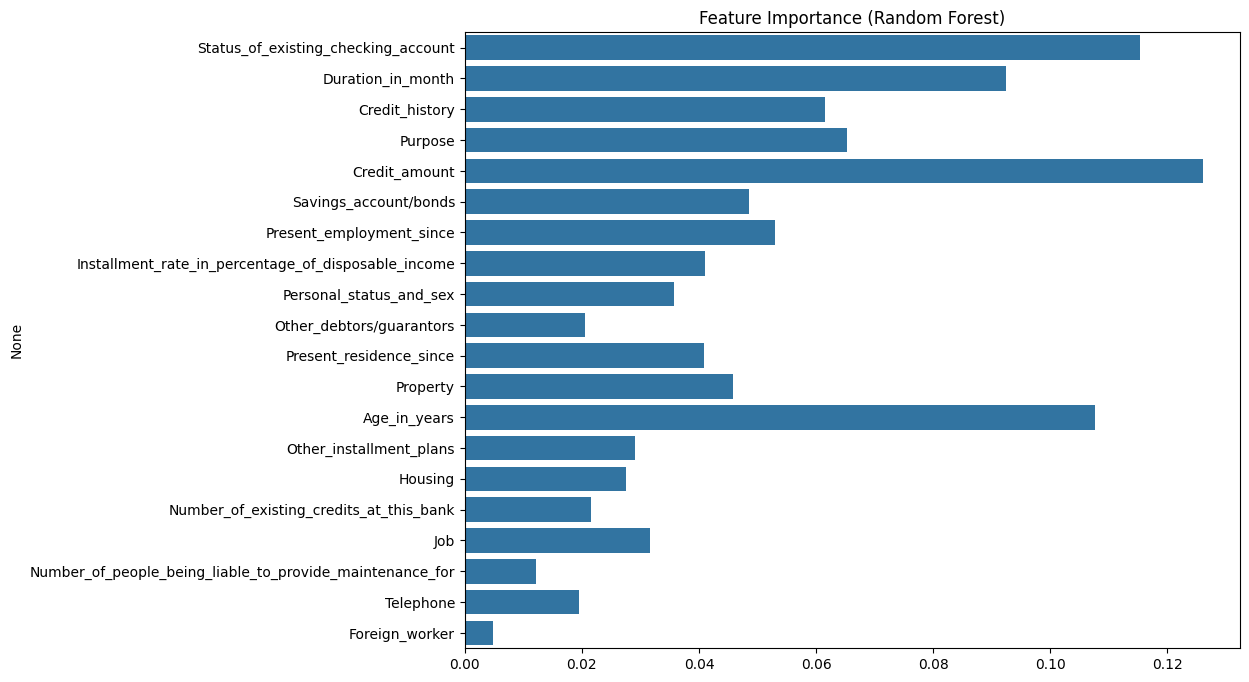

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()
